In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from mlxtend.frequent_patterns import apriori, association_rules
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Đọc file dataset và kiểm tra hông tin

In [ ]:
# Đọc các file dataset
train = pd.read_csv("/content/drive/MyDrive/DataMining/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/DataMining/data/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/DataMining/data/sample_submission.csv")

Hiển thị thông tin của các tập dữ liệu

In [ ]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
sample.head(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


Thống kê 2 tập dữ liệu

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
sample.describe()

,Item_Outlet_Sales
count,5681.0
mean,1000.0
std,0.0
min,1000.0
25%,1000.0
50%,1000.0
75%,1000.0
max,1000.0


In [ ]:
#Kiểm tra giá trị duy nhất
c_train = train.select_dtypes(include=['object'])
for c in c_train.columns:
    unique_values = c_train[c].unique()
    print(f"Cột: {c}")
    print(f"Giá trị duy nhất: {unique_values}")
    print("\n")

Cột: Item_Identifier
Giá trị duy nhất: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Cột: Item_Fat_Content
Giá trị duy nhất: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Cột: Item_Type
Giá trị duy nhất: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Cột: Outlet_Identifier
Giá trị duy nhất: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Cột: Outlet_Size
Giá trị duy nhất: ['Medium' nan 'High' 'Small']


Cột: Outlet_Location_Type
Giá trị duy nhất: ['Tier 1' 'Tier 3' 'Tier 2']


Cột: Outlet_Type
Giá trị duy nhất: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [ ]:
#Kiểm tra giá trị duy nhất
c_test = test.select_dtypes(include=['object'])
for c in c_train.columns:
    unique_values = c_train[c].unique()
    print(f"Cột: {c}")
    print(f"Giá trị duy nhất: {unique_values}")
    print("\n")

Cột: Item_Identifier
Giá trị duy nhất: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Cột: Item_Fat_Content
Giá trị duy nhất: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Cột: Item_Type
Giá trị duy nhất: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Cột: Outlet_Identifier
Giá trị duy nhất: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Cột: Outlet_Size
Giá trị duy nhất: ['Medium' nan 'High' 'Small']


Cột: Outlet_Location_Type
Giá trị duy nhất: ['Tier 1' 'Tier 3' 'Tier 2']


Cột: Outlet_Type
Giá trị duy nhất: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




# Tiền xử lí dữ liệu

Kiểm tra null

In [ ]:
print(train.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


Xử lí

In [ ]:
# Xử lí giá trị null cột Item Weight
mean_item_weight=train['Item_Weight'].mean()
train['Item_Weight'].fillna(mean_item_weight, inplace=True)

mean_item_weight=test['Item_Weight'].mean()
test['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [ ]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [ ]:
#In giá trị xh nhiều nhất
print('train:',train['Outlet_Size'].mode()[0])
print('test:',test['Outlet_Size'].mode()[0])

train: Medium
test: Medium


In [ ]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
print(train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
print(test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Xử lí dữ liệu không nhất quán

In [ ]:
print("train",train['Item_Fat_Content'].unique())
print("test",train['Item_Fat_Content'].unique())

train ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
test ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
#Tiến hành xử lí dữ liệu không nhất quán
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [ ]:
#Kiểm tra lại
print("train",train['Item_Fat_Content'].value_counts())
print("test",test['Item_Fat_Content'].value_counts())

train Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
test Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64


Xử lí ngoại biên

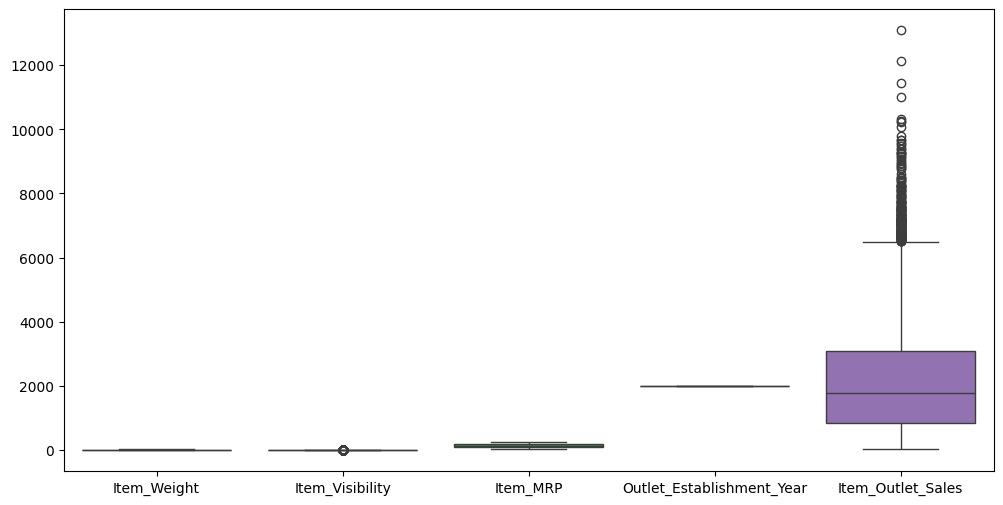

In [ ]:
#Kiểm tra giá trị ngoại biên
plt.figure(figsize=(12, 6))
fig = sns.boxplot(data=train)
fig.set_xticks(range(5))

In [ ]:
#Dùng tứ phân vị xử lí
num_col = train.select_dtypes(include=['number']).columns
q1 = train[num_col].quantile(0.25)
q3 = train[num_col].quantile(0.75)
iqr = q3 - q1
train = train[~((train[num_col] < (q1 - 1.5 * iqr)) | (train[num_col] > (q3 + 1.5 * iqr))).any(axis=1)]


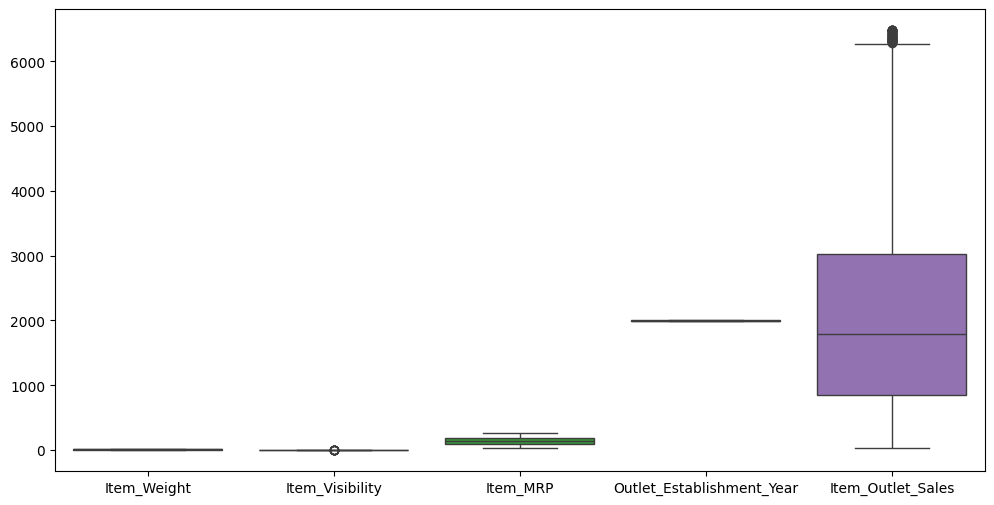

In [ ]:
#Kiểm tra giá trị ngoại biên
plt.figure(figsize=(12, 6))
fig = sns.boxplot(data=train)
fig.set_xticks(range(5))

In [ ]:
train.shape

(8193, 12)

Xóa cột định danh

In [ ]:
train =train.drop(['Item_Identifier'],axis=1)
test =test.drop(['Item_Identifier'],axis=1)

In [ ]:
print(train.columns)
print(test.columns)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


## Khai thác mẫu và luật kết hợp

Ta sẽ tiến hành khai thác mẫu và luật kết hợp trên tập train

In [ ]:
data=train.copy()

Rời rạc hóa

In [ ]:
#Outlet_Establishment_Year
bins = [0, 2000, float('inf')]
labels = ['Long standing', 'Recent']
data['Outlet_Establishment_Year']=pd.cut(data['Outlet_Establishment_Year'], bins=bins, labels=labels)

#Item_Weight
bins = [0, 5, 10, float('inf')]
labels = ['Light', 'Medium', 'Heavy']
data['Item_Weight'] = pd.cut(data['Item_Weight'], bins=bins, labels=labels)

#Item_Visibility
bins = [-1, 0.05, 0.12, float('inf')]
labels = ['Low', 'Medium', 'high']
data['Item_Visibility'] = pd.cut(data['Item_Visibility'], bins=bins, labels=labels)

#Item_MRP
bins = [0, 115, 160, float('inf')]
labels = ['Low', 'Medium', 'high']
data['Item_MRP'] = pd.cut(data['Item_MRP'], bins=bins, labels=labels)

#Item_Outlet_Sales
bins = [-1, 475,1900,2800, 4500, float('inf')]
labels = ["Very low",'Low', 'Medium', 'high',"Very high"]
data['Item_Outlet_Sales'] = pd.cut(data['Item_Outlet_Sales'], bins=bins, labels=labels)

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Medium,Low Fat,Low,Dairy,high,OUT049,Long standing,Medium,Tier 1,Supermarket Type1,high
1,Medium,Regular,Low,Soft Drinks,Low,OUT018,Recent,Medium,Tier 3,Supermarket Type2,Very low
2,Heavy,Low Fat,Low,Meat,Medium,OUT049,Long standing,Medium,Tier 1,Supermarket Type1,Medium
3,Heavy,Regular,Low,Fruits and Vegetables,high,OUT010,Long standing,Medium,Tier 3,Grocery Store,Low
4,Medium,Low Fat,Low,Household,Low,OUT013,Long standing,High,Tier 3,Supermarket Type1,Low


Chuyển đổi dữ liệu

In [ ]:
#chuyển về one hot
data = pd.get_dummies(data, columns=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'])
data.head()

,Item_Weight_Light,Item_Weight_Medium,Item_Weight_Heavy,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Visibility_Low,Item_Visibility_Medium,Item_Visibility_high,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales_Very low,Item_Outlet_Sales_Low,Item_Outlet_Sales_Medium,Item_Outlet_Sales_high,Item_Outlet_Sales_Very high
0,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,True,False,False,True,True,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
2,False,False,True,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,True,False,True,True,False,False,False,False,...,True,True,False,False,False,False,True,False,False,False
4,False,True,False,True,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False


Tiến hành tìm tập phổ biến và khai thác luật

In [ ]:
#Tìm tập phổ biến bằng Apriori với min support là 40%
frequent_itemsets = apriori(data, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.711461,(Item_Weight_Heavy),1
1,0.647992,(Item_Fat_Content_Low Fat),1
2,0.483217,(Item_Visibility_Low),1
3,0.552545,(Outlet_Establishment_Year_Long standing),1
4,0.447455,(Outlet_Establishment_Year_Recent),1
5,0.609179,(Outlet_Size_Medium),1
6,0.670939,(Outlet_Type_Supermarket Type1),1
7,0.460149,"(Item_Weight_Heavy, Item_Fat_Content_Low Fat)",2
8,0.419627,"(Item_Weight_Heavy, Outlet_Establishment_Year_...",2
9,0.434151,"(Item_Weight_Heavy, Outlet_Size_Medium)",2


In [ ]:
#Khai thác luật kết hợp
rules = association_rules(frequent_itemsets, min_threshold=0.5)
rules[['antecedents','consequents','support','confidence']]

,antecedents,consequents,support,confidence
0,(Item_Weight_Heavy),(Item_Fat_Content_Low Fat),0.460149,0.646766
1,(Item_Fat_Content_Low Fat),(Item_Weight_Heavy),0.460149,0.710115
2,(Item_Weight_Heavy),(Outlet_Establishment_Year_Long standing),0.419627,0.589810
3,(Outlet_Establishment_Year_Long standing),(Item_Weight_Heavy),0.419627,0.759443
4,(Item_Weight_Heavy),(Outlet_Size_Medium),0.434151,0.610225
5,(Outlet_Size_Medium),(Item_Weight_Heavy),0.434151,0.712683
6,(Item_Weight_Heavy),(Outlet_Type_Supermarket Type1),0.441596,0.620690
7,(Outlet_Type_Supermarket Type1),(Item_Weight_Heavy),0.441596,0.658177
8,(Item_Fat_Content_Low Fat),(Outlet_Type_Supermarket Type1),0.434029,0.669806
9,(Outlet_Type_Supermarket Type1),(Item_Fat_Content_Low Fat),0.434029,0.646898


# Xây dựng mô hình và đánh giá kết quả

Chuẩn hóa dữ liệu

In [ ]:
#Mã hóa về dạng số
for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    label_encoder = LabelEncoder()
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])

In [ ]:
train.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


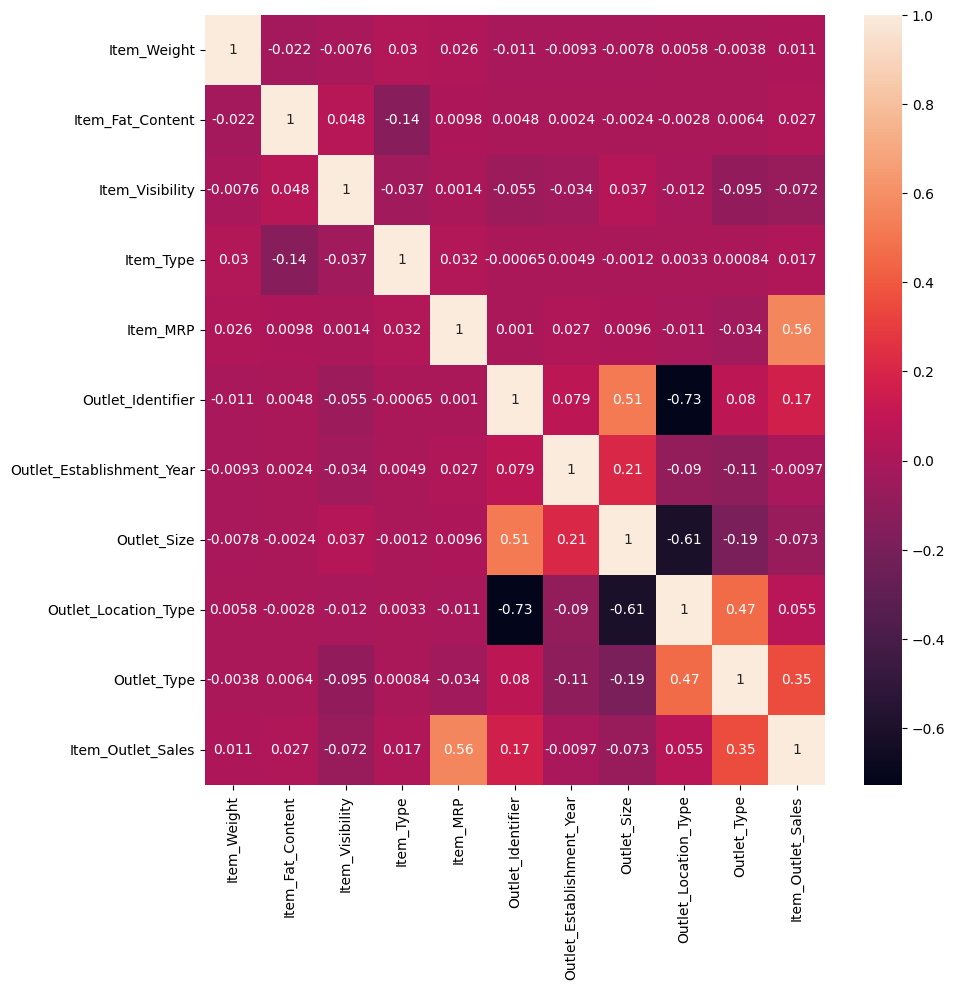

In [ ]:
#Kiểm tra tương quan dữ liệu
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25, random_state = 11)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((6144, 10), (6144,), (2049, 10), (2049,))

Mô hình linear regression khi chưa được bổ sung cột clusters

In [ ]:
#Khởi tạo và huấn luyện
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
#Đánh giá
mse_no_clusters = mean_squared_error(y_test, y_pred)
mae_no_clusters = mean_absolute_error(y_test, y_pred)
rmse_no_clusters = np.sqrt(mse_no_clusters)
r2_no_clusters = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_no_clusters}")
print(f"Mean Absolute Error: {mae_no_clusters}")
print(f"Root Mean Squared Error: {rmse_no_clusters}")
print(f"R-squared: {r2_no_clusters}")

Mean Squared Error: 1137820.7439694453
Mean Absolute Error: 823.6689762029561
Root Mean Squared Error: 1066.6868068788726
R-squared: 0.4930648619365956


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
train_features = train.drop(columns=['Item_Outlet_Sales'])
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test)
train_features

array([[-0.83528563, -0.73704035, -1.01927283, ..., -0.27715621,
        -1.36803344, -0.26149149],
       [-1.62746279,  1.35677782, -0.94946348, ..., -0.27715621,
         1.1048398 ,  1.0369326 ],
       [ 1.08656428, -0.73704035, -1.00387215, ..., -0.27715621,
        -1.36803344, -0.26149149],
       ...,
       [-0.5306021 , -0.73704035, -0.60574318, ...,  1.38274207,
        -0.13159682, -0.26149149],
       [-1.32512298,  1.35677782,  1.77173463, ..., -0.27715621,
         1.1048398 ,  1.0369326 ],
       [ 0.45376005, -0.73704035, -0.39633102, ...,  1.38274207,
        -1.36803344, -0.26149149]])

Phân cụm tập train và tập test bằng thuật toán EM

In [ ]:
gmm = GaussianMixture(n_components=12, random_state=42)
train['clusters'] = gmm.fit_predict(train_features)
test['clusters'] = gmm.fit_predict(test_features)

In [ ]:
train['clusters']

0        3
1        2
2        3
3        5
4        7
        ..
8518     7
8519    11
8520     9
8521     2
8522    10
Name: clusters, Length: 8193, dtype: int64

In [ ]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,clusters
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,3
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,2
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,3
3,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,5
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,7
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,7
8519,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,11
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,9
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,2


Xây dựng mô hình Linear Regression với kết quả gom cụm

In [ ]:
#Model Making
from sklearn.model_selection import train_test_split
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25, random_state = 7)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6144, 11), (6144,), (2049, 11), (2049,))

In [ ]:
#Khởi tạo và huấn luyện
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [ ]:
#Đánh giá
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1080974.9920954038
Mean Absolute Error: 807.6764819192066
Root Mean Squared Error: 1039.6994720088126
R-squared: 0.5332555278367164


In [ ]:
#Dự đoán trên tập test
pred_test= lin_reg.predict(test)

In [ ]:
print(pred_test)

[2202.67973538 1250.68361108 1764.11590082 ... 1851.36349109 3025.88748413
  962.59005318]


So sánh độ hiệu quả khi áp dụng phân cụm vào việc dự đoán doanh số bán hàng với mô hình LinearRegression

In [ ]:
print(f"MSE hiệu quả hơn {(mse_no_clusters-mse)/mse_no_clusters*100:.2f} %")
print(f"MAE hiệu quả hơn {(mae_no_clusters-mae)/mae_no_clusters*100:.2f} %")
print(f"RMSE hiệu quả hơn {(rmse_no_clusters-rmse)/rmse_no_clusters*100:.2f} %")
print(f"R-squared được cải thiện hơn {(r2-r2_no_clusters)*100:.2f} %")


MSE hiệu quả hơn 5.00 %
MAE hiệu quả hơn 1.94 %
RMSE hiệu quả hơn 2.53 %
R-squared được cải thiện hơn 4.02 %
